In [1]:
import deimos
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
import sys
sys.path.append("../src/")
sys.path.append("D:/metabolome_inference/metabolome_inference/src/")
from PeakDetective import rawData,PeakDetective,Classifier,Smoother,normalizeMatrix,safeNormalize
import detection_helper
import scipy.stats as stats
import seaborn as sb
from matplotlib.colors import LinearSegmentedColormap


In [2]:
datadir = "../data/mzMLs/plasma/"
resolution = 60


In [3]:
ms1ppm = 10
peakWidth = (15,83)
s2n = 5
noise = 2
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
det.to_skyline(datadir+"xcms_peak_list_transition_list.csv","Negative",moleculeListName = "XCMS peaks")
peakList = pd.DataFrame(det.peakList)
peakList["rt"] = .5 * peakList["rt_start"] + .5 * peakList["rt_end"]
peakList = peakList[["mz","rt"]]
peakList

,mz,rt
1,69.009257,3.725231
2,69.009265,1.295355
3,70.945947,5.305746
4,70.945928,5.219294
5,71.050080,1.217948
...,...,...
5250,879.818163,8.490083
5251,887.327660,8.490083
5252,889.803276,8.819713
5253,889.803118,8.740758


In [4]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
print(files)
raw_data = []
for file in files:
    temp = rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data.append(temp)
    

['WU350-075_d7_neg_ID_04.mzML', 'WU350-087_d0_ID_04.mzML', 'WU350-092_d14_neg_ID_04.mzML']


generated EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done
fitting smoother...
Epoch 1/20
222/222 [==============================] - 8s 28ms/step - loss: 0.5072 - mean_absolute_error: 0.3616 - val_loss: 0.1205 - val_mean_absolute_error: 0.0504
Epoch 2/20
222/222 [==============================] - 5s 24ms/step - loss: 0.1150 - mean_absolute_error: 0.0445 - val_loss: 0.0933 - val_mean_absolute_error: 0.0299
Epoch 3/20
222/222 [==============================] - 5s 24ms/step - loss: 0.0912 - mean_absolute_error: 0.0258 - val_loss: 0.0772 - val_mean_absolute_error: 0.0163
Epoch 4/20
222/222 [==============================] - 5s 23ms/step - loss: 0.0792 - mean_absolute_error: 0.0152 - val_loss: 0.0728 - val_mean_absolute_error: 0.0122
Epoch 5/20
222/222 [==============================] - 5s 22ms/step - loss: 0.0758 - mean_absolute_error: 0.0124 - val_loss: 0.0708 - val_mean_absolute_error: 0.0105
Epoch 6/20
222/222 [==============================] - 5s

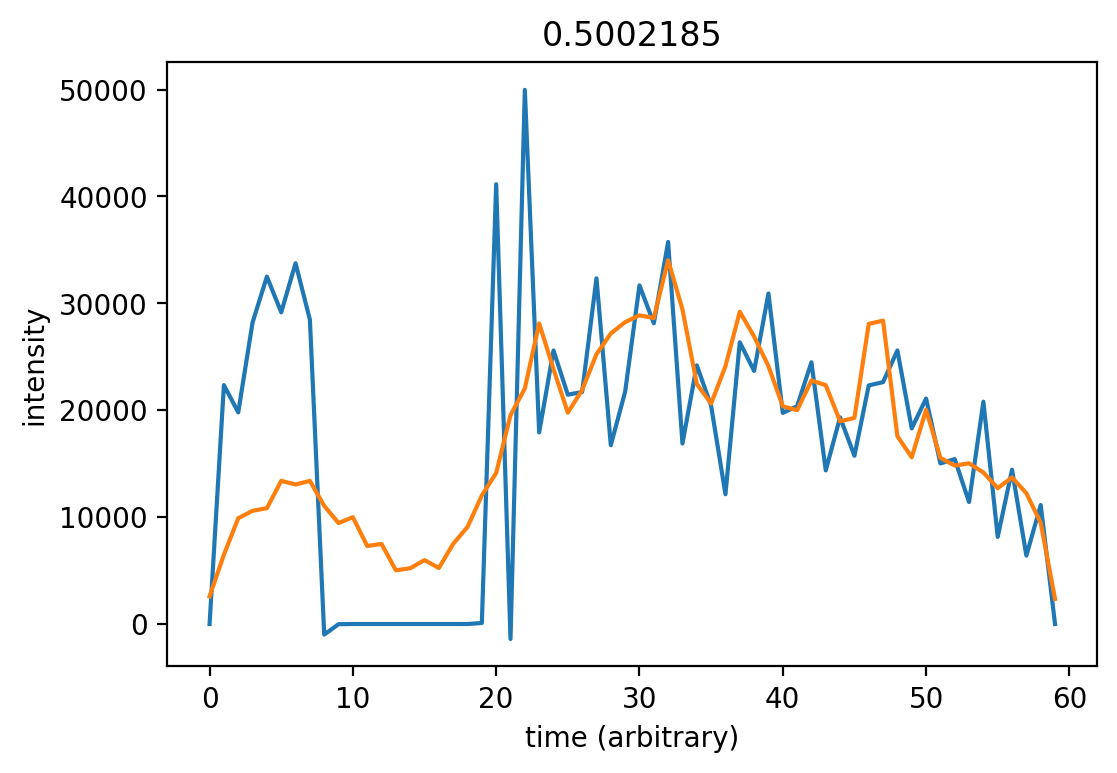

Enter classification (1=True Peak, 0=Artifact): 
0


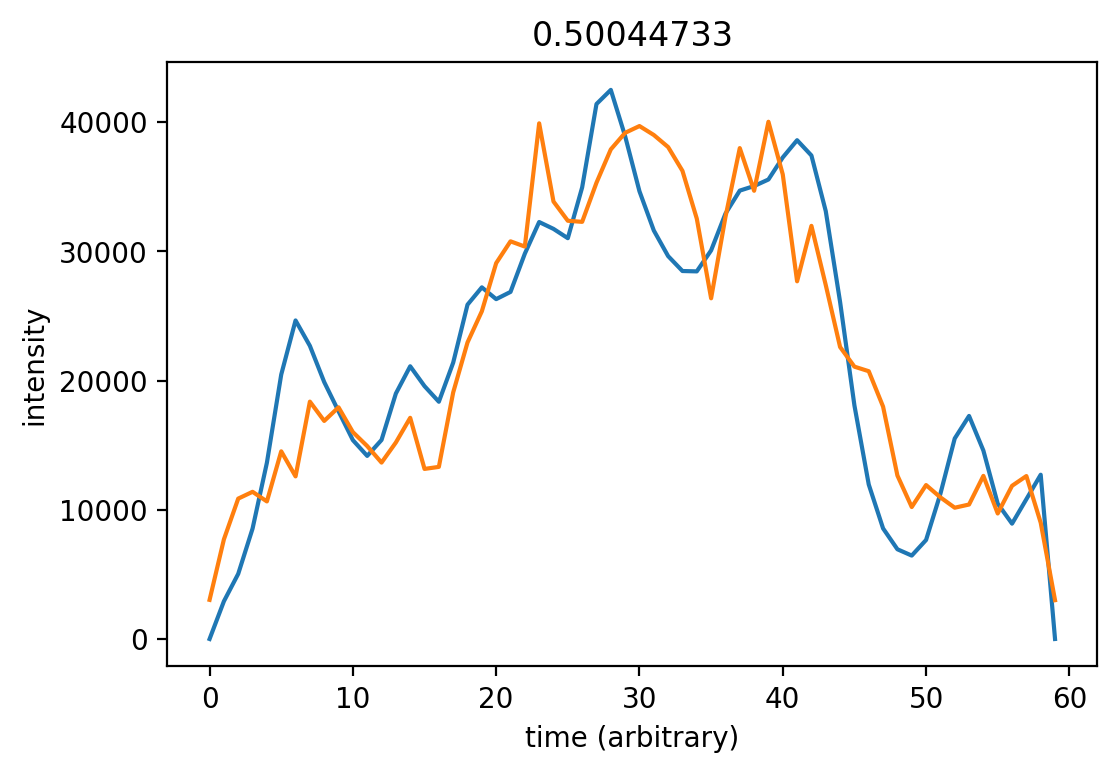

Enter classification (1=True Peak, 0=Artifact): 
0


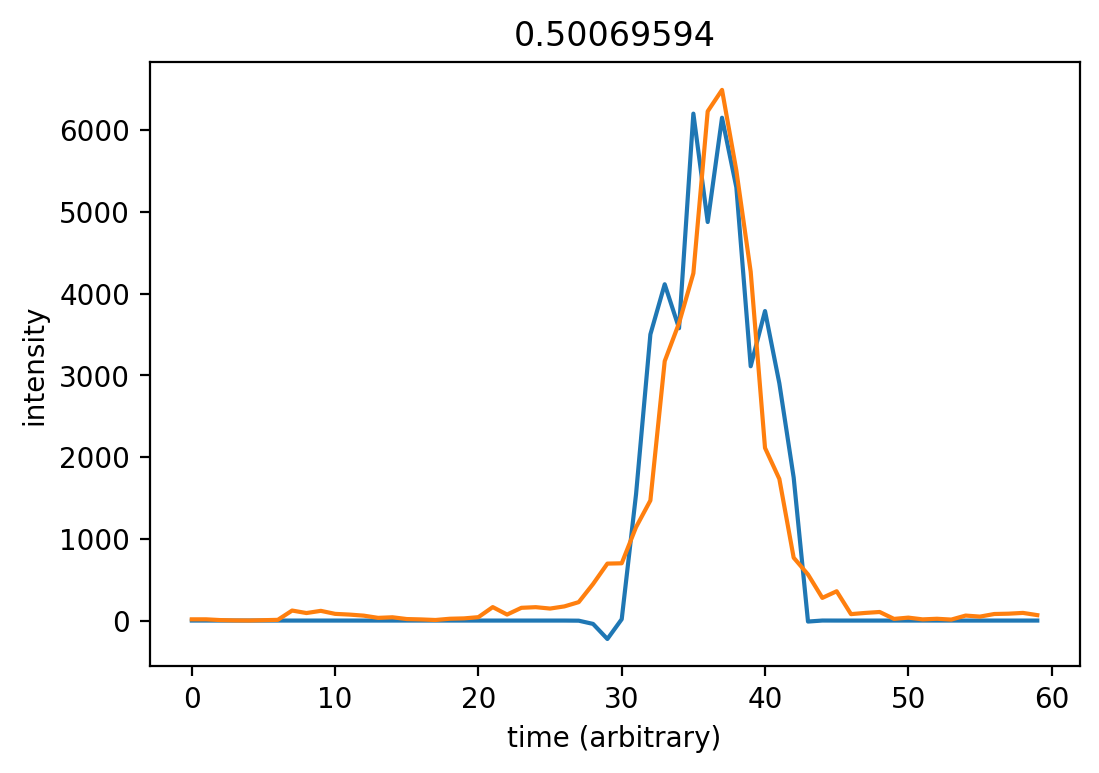

Enter classification (1=True Peak, 0=Artifact): 
1
round 2: 1568 unclassified features


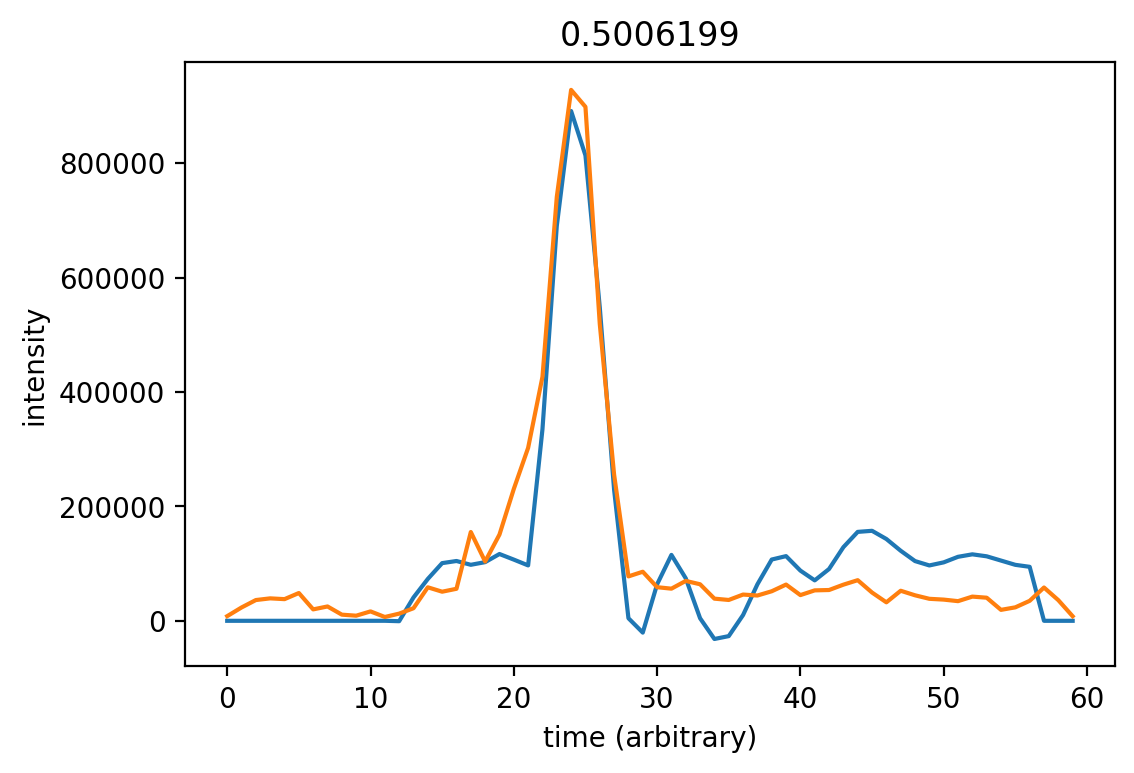

Enter classification (1=True Peak, 0=Artifact): 
1


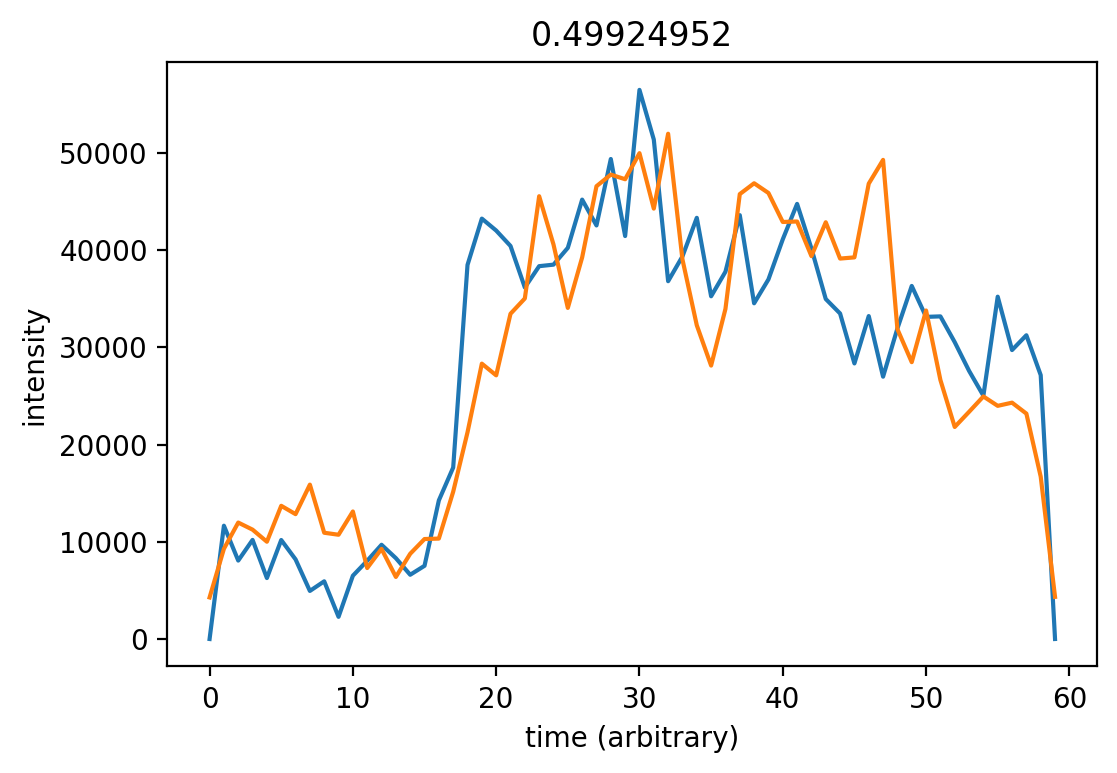

Enter classification (1=True Peak, 0=Artifact): 
0


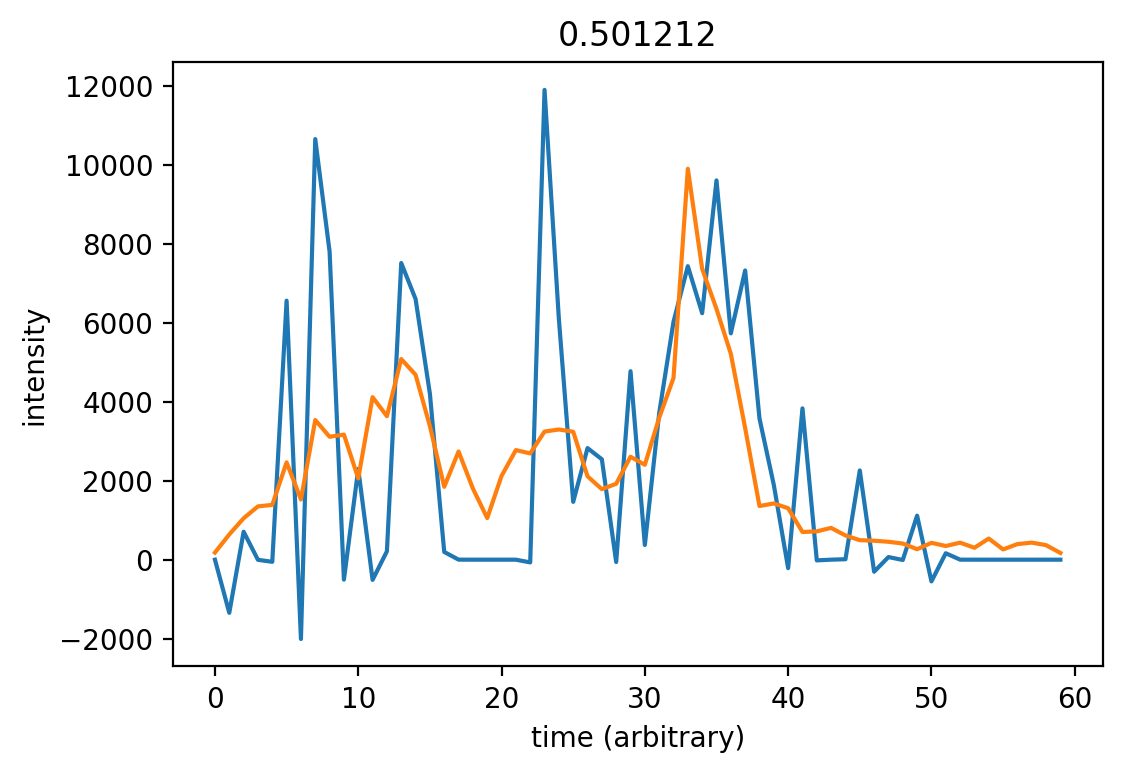

Enter classification (1=True Peak, 0=Artifact): 
0
round 3: 1172 unclassified features


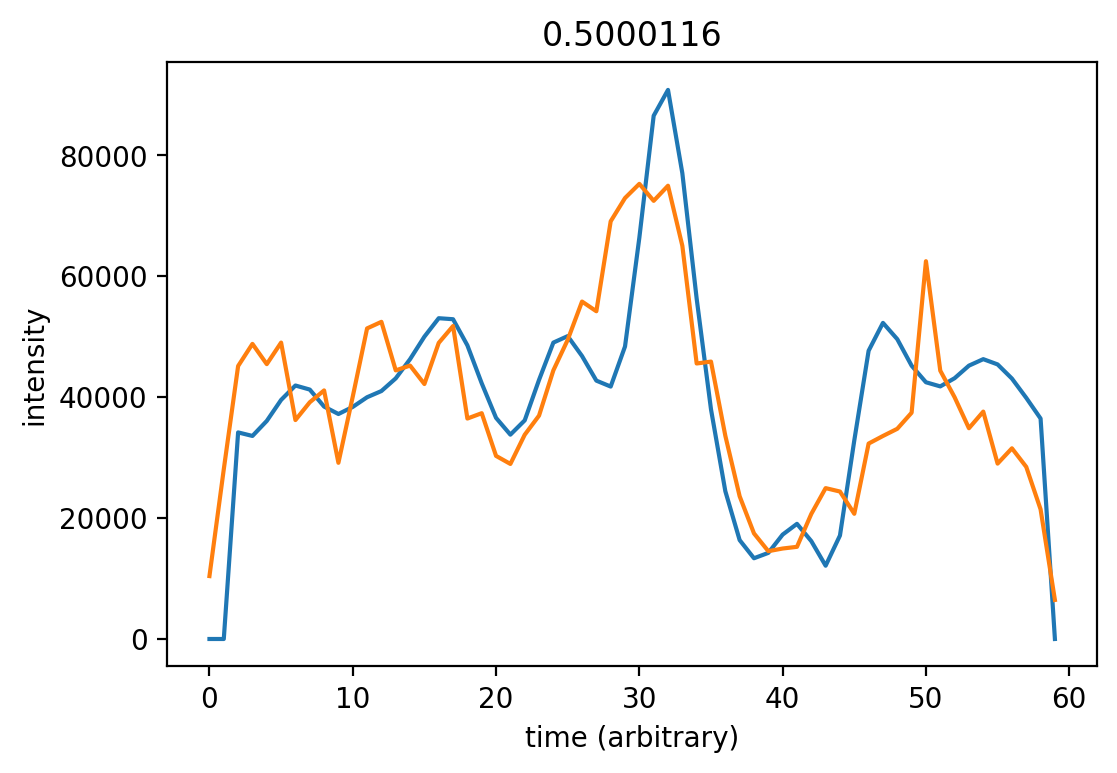

Enter classification (1=True Peak, 0=Artifact): 
0


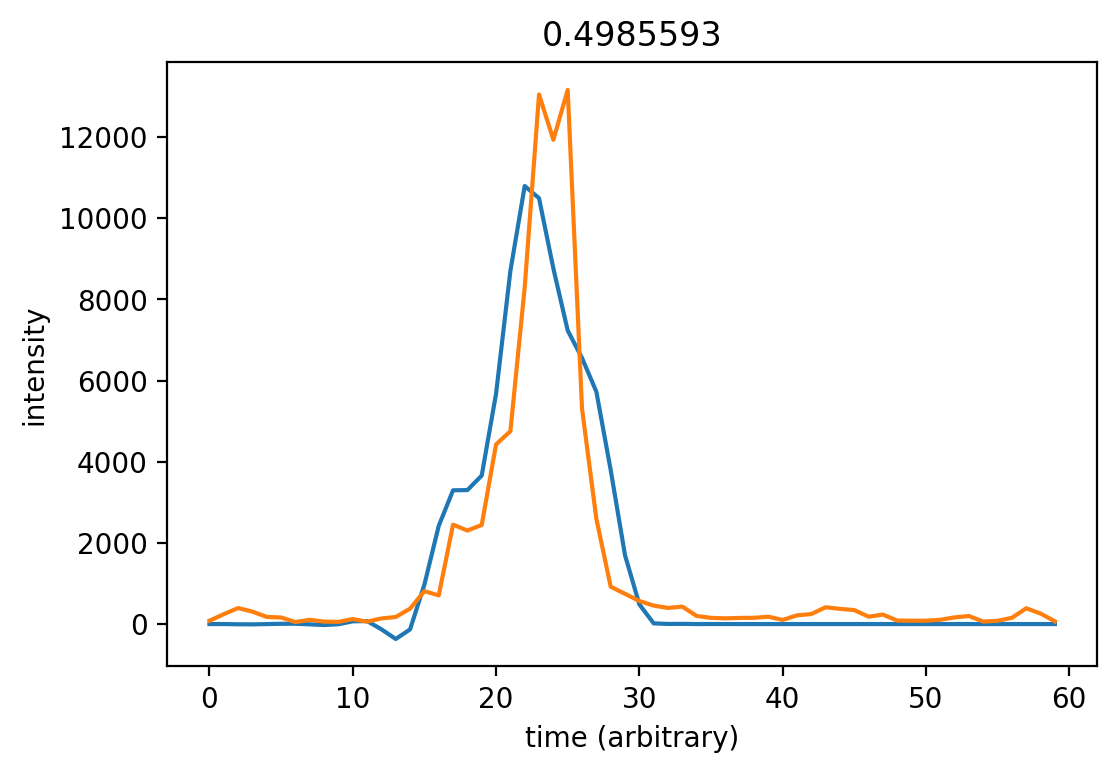

Enter classification (1=True Peak, 0=Artifact): 
1


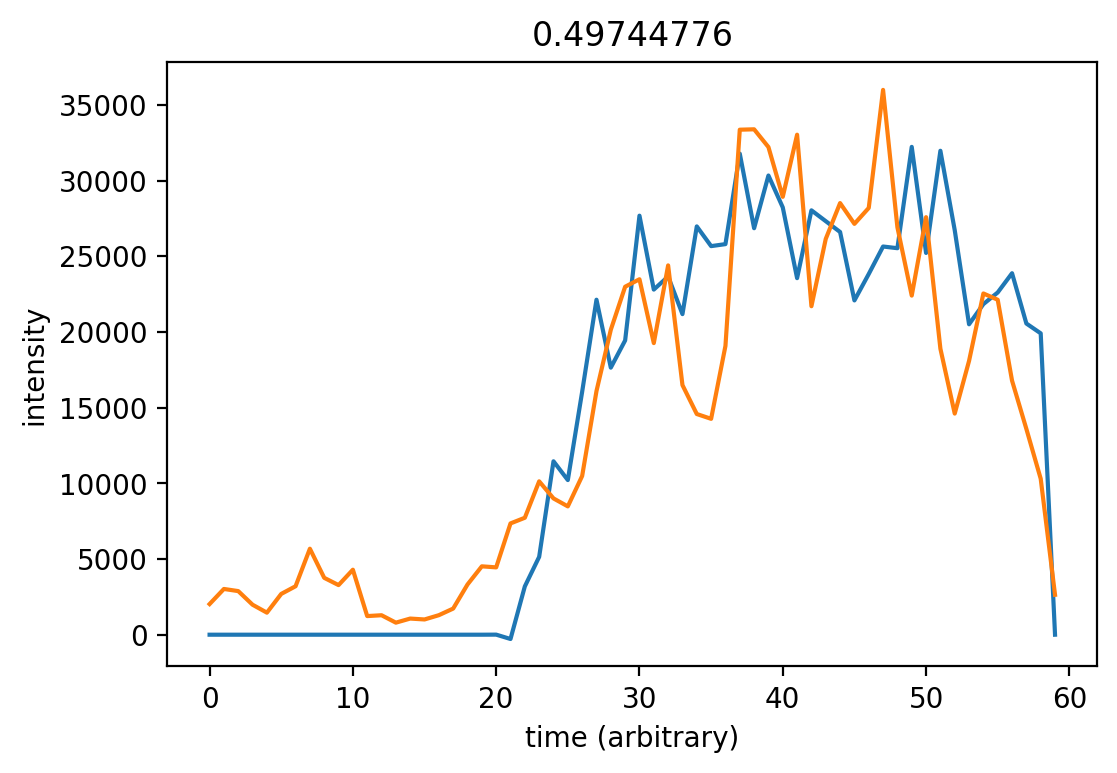

Enter classification (1=True Peak, 0=Artifact): 
0
round 4: 928 unclassified features


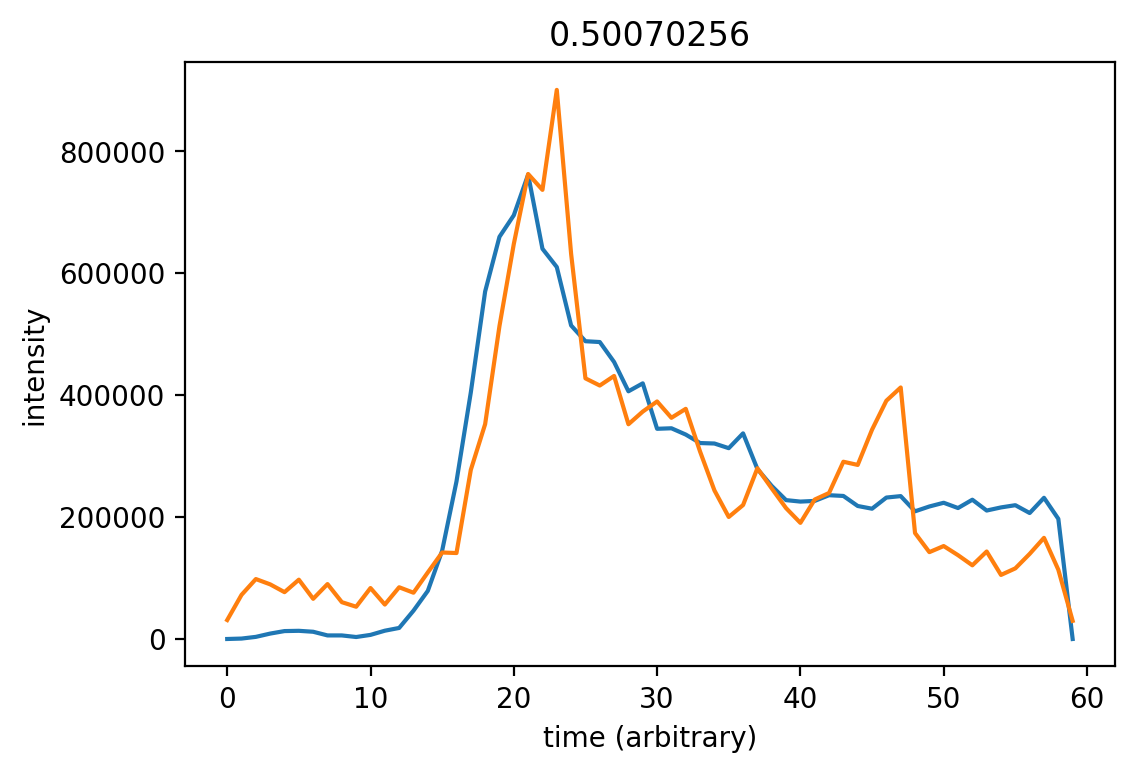

Enter classification (1=True Peak, 0=Artifact): 
1


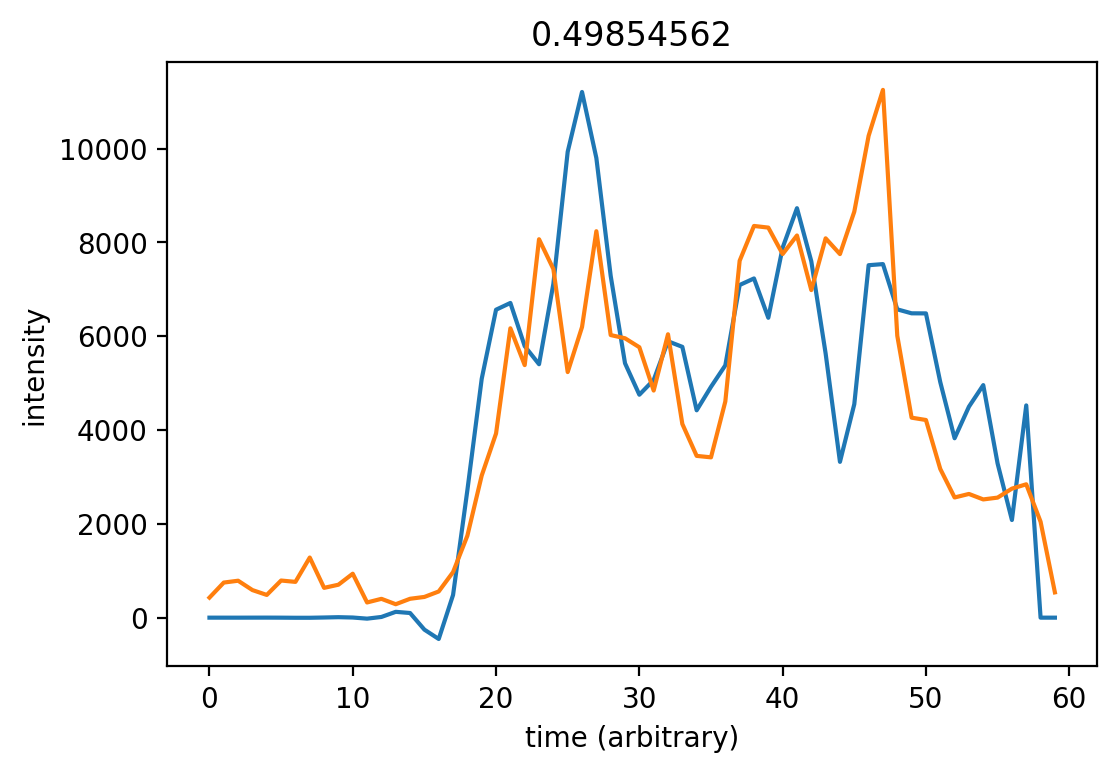

Enter classification (1=True Peak, 0=Artifact): 
0


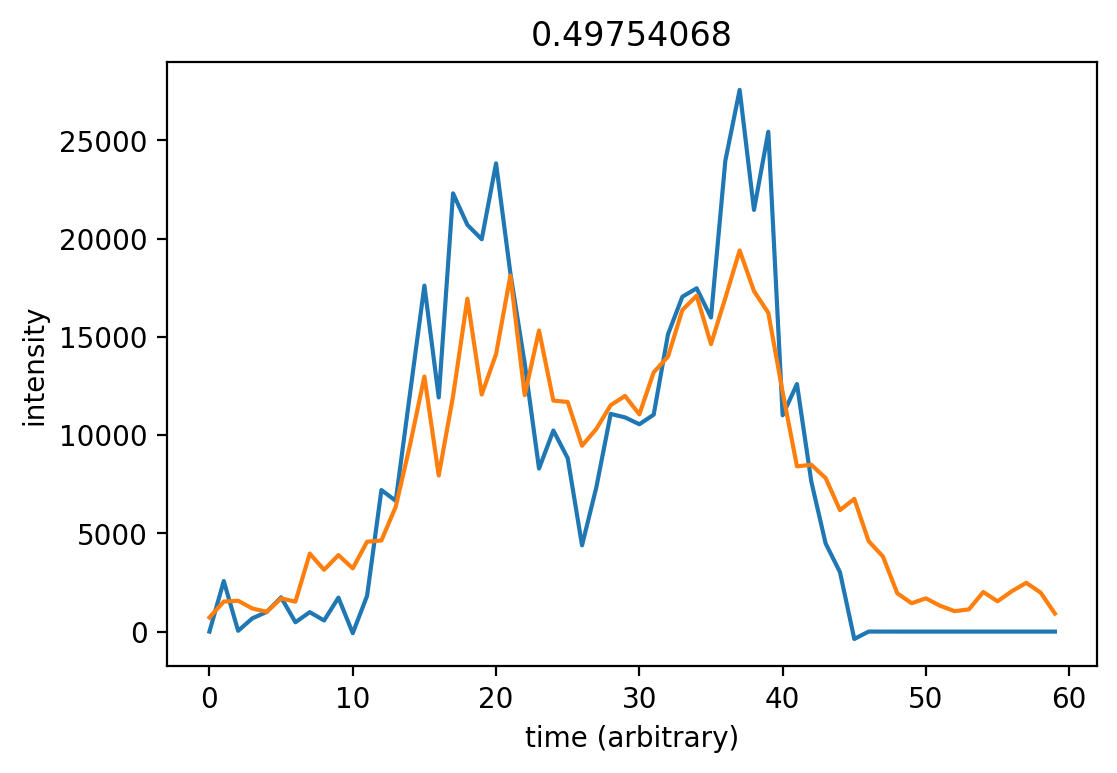

Enter classification (1=True Peak, 0=Artifact): 
0
round 5: 907 unclassified features


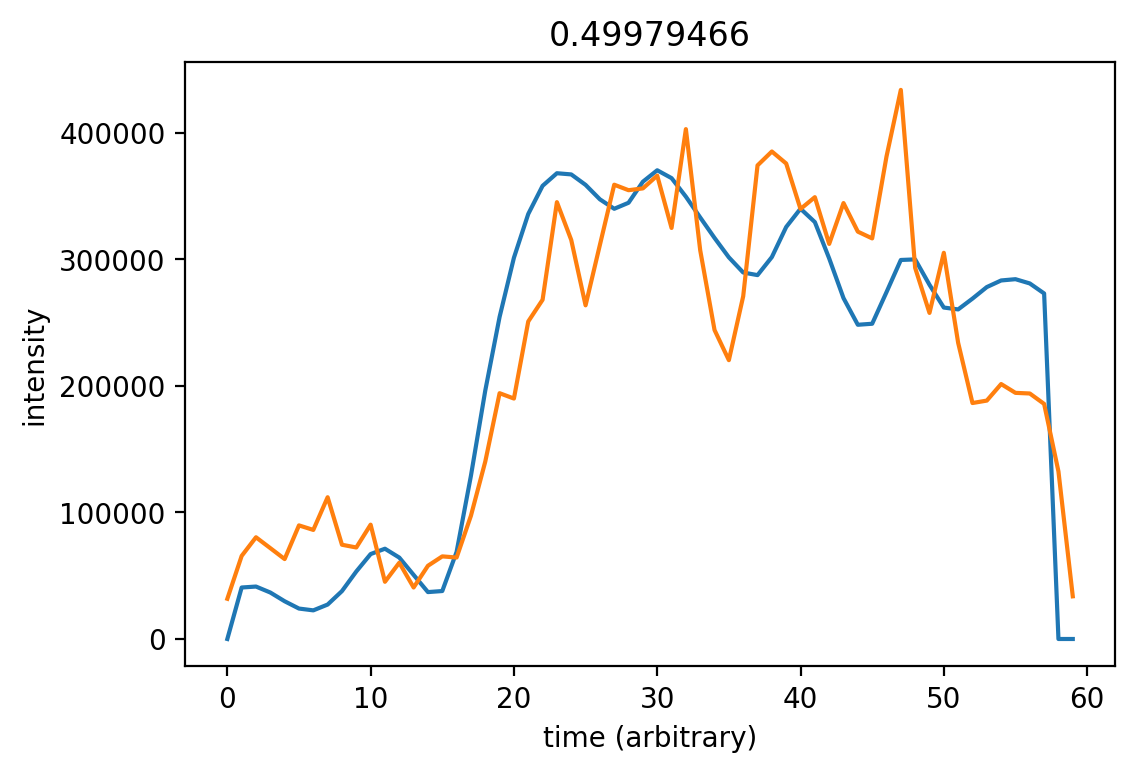

Enter classification (1=True Peak, 0=Artifact): 
0


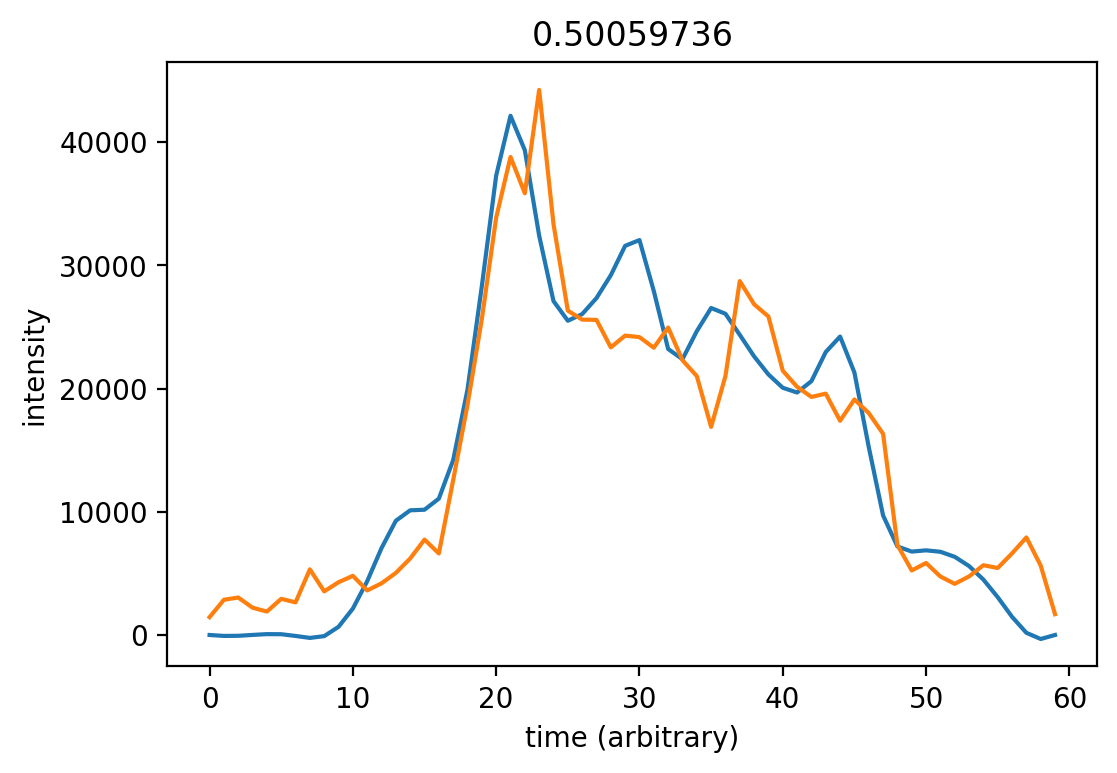

Enter classification (1=True Peak, 0=Artifact): 
0


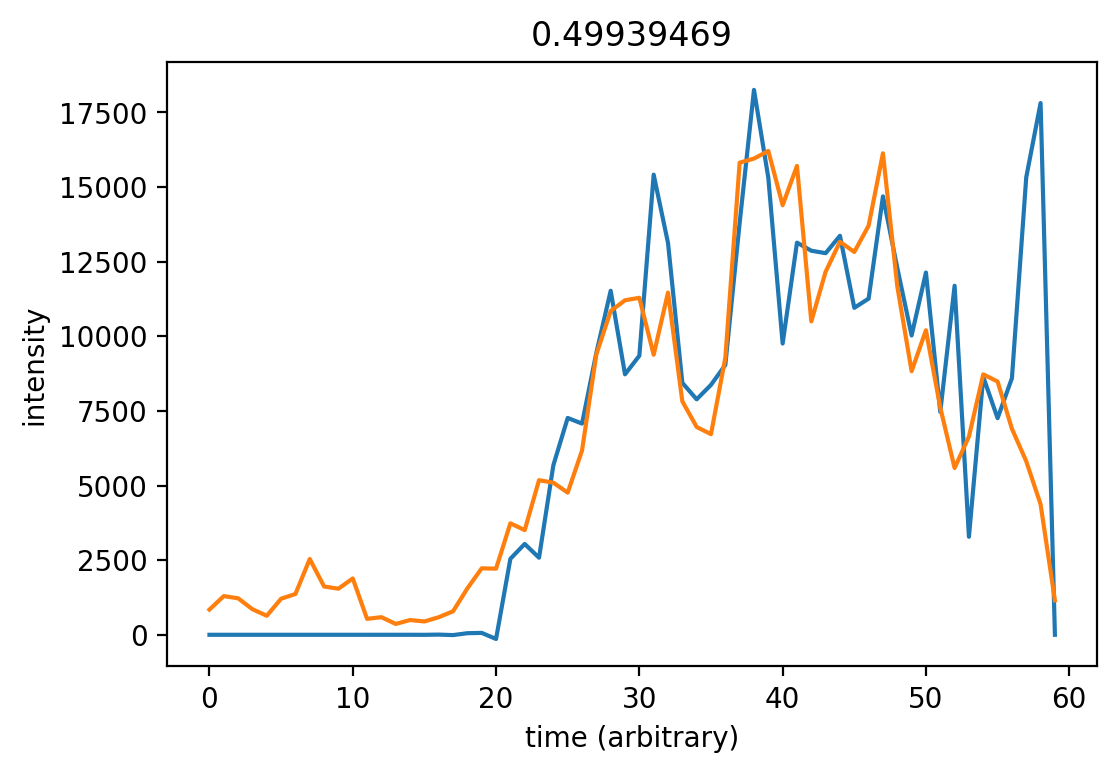

Enter classification (1=True Peak, 0=Artifact): 
0
done
training classifier...
Epoch 1/10
665/665 [==============================] - 3s 4ms/step - loss: 0.7173 - mean_absolute_error: 0.4941 - val_loss: 0.7269 - val_mean_absolute_error: 0.5243
Epoch 2/10
665/665 [==============================] - 3s 4ms/step - loss: 0.5229 - mean_absolute_error: 0.3181 - val_loss: 0.3343 - val_mean_absolute_error: 0.1466
Epoch 3/10
665/665 [==============================] - 3s 4ms/step - loss: 0.1841 - mean_absolute_error: 0.0736 - val_loss: 0.2174 - val_mean_absolute_error: 0.0981
Epoch 4/10
665/665 [==============================] - 3s 4ms/step - loss: 0.1290 - mean_absolute_error: 0.0524 - val_loss: 0.1994 - val_mean_absolute_error: 0.0847
Epoch 5/10
665/665 [==============================] - 3s 4ms/step - loss: 0.1069 - mean_absolute_error: 0.0427 - val_loss: 0.1748 - val_mean_absolute_error: 0.0705
Epoch 6/10
665/665 [==============================] - 3s 4ms/step - loss: 0.0967 - mean_absolute_erro

In [5]:
#format X
if __name__ == "__main__":
    integ = PeakDetective(numCores = 20,resolution=resolution)
    ms1_peaks_curated,X_norm,X_orig,tics,scores,progress = integ.curatePeaks(raw_data,peakList,min_peaks=10000,shift=2.0,smooth_epochs=20)

In [6]:
ms1_peaks_curated

{'../data/mzMLs/plasma/WU350-075_d7_neg_ID_04.mzML':               mz         rt
 3      70.945947   5.305746
 4      70.945928   5.219294
 5      71.050080   1.217948
 6      71.013688   2.891141
 7      71.013710   6.073578
 ...          ...        ...
 5241  878.702212  12.350815
 5248  878.812666   8.638001
 5249  879.287514   5.130518
 5252  889.803276   8.819713
 5254  889.803216  11.103857
 
 [3357 rows x 2 columns],
 '../data/mzMLs/plasma/WU350-087_d0_ID_04.mzML':               mz         rt
 3      70.945947   5.305746
 4      70.945928   5.219294
 5      71.050080   1.217948
 6      71.013688   2.891141
 7      71.013710   6.073578
 ...          ...        ...
 5199  790.831072   8.583641
 5200  790.830837   8.663339
 5203  791.334234   8.547961
 5205  791.738944  12.767714
 5208  798.759031  12.321413
 
 [3188 rows x 2 columns],
 '../data/mzMLs/plasma/WU350-092_d14_neg_ID_04.mzML':               mz         rt
 3      70.945947   5.305746
 4      70.945928   5.219294
 5      

[15762, 1568, 1172, 928, 907]


Text(0, 0.5, 'log10(# of uncertain peaks)')

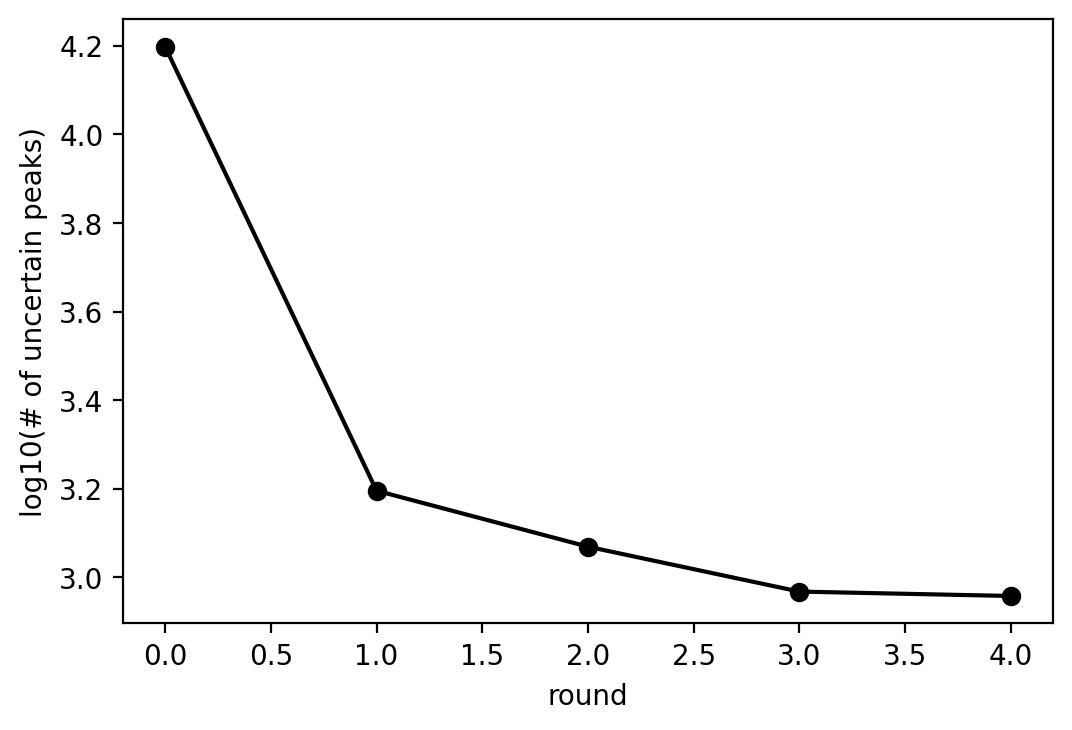

In [7]:
print(progress)
plt.plot(list(range(len(progress))),np.log10(progress),color="black")
plt.scatter(list(range(len(progress))),np.log10(progress),color="black")
plt.xlabel("round")
plt.ylabel("log10(# of uncertain peaks)")

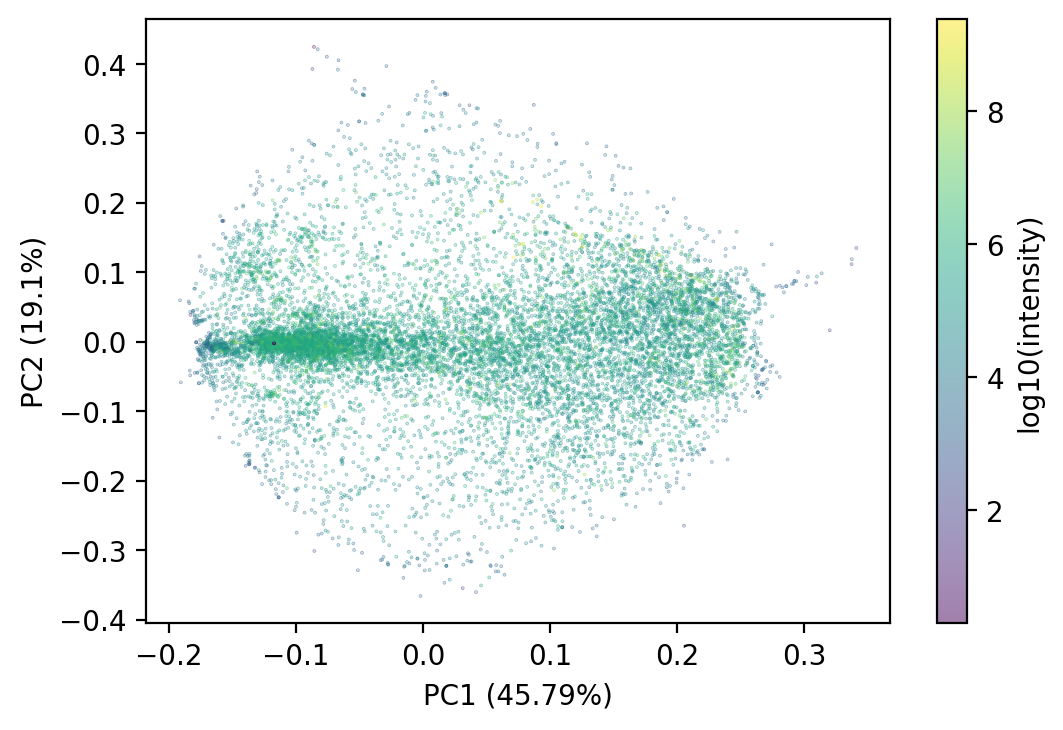

In [8]:
pca = PCA(2)
loads = pca.fit_transform(X_norm)
plt.scatter(loads[:,0],loads[:,1],c=tics,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log10(intensity)")

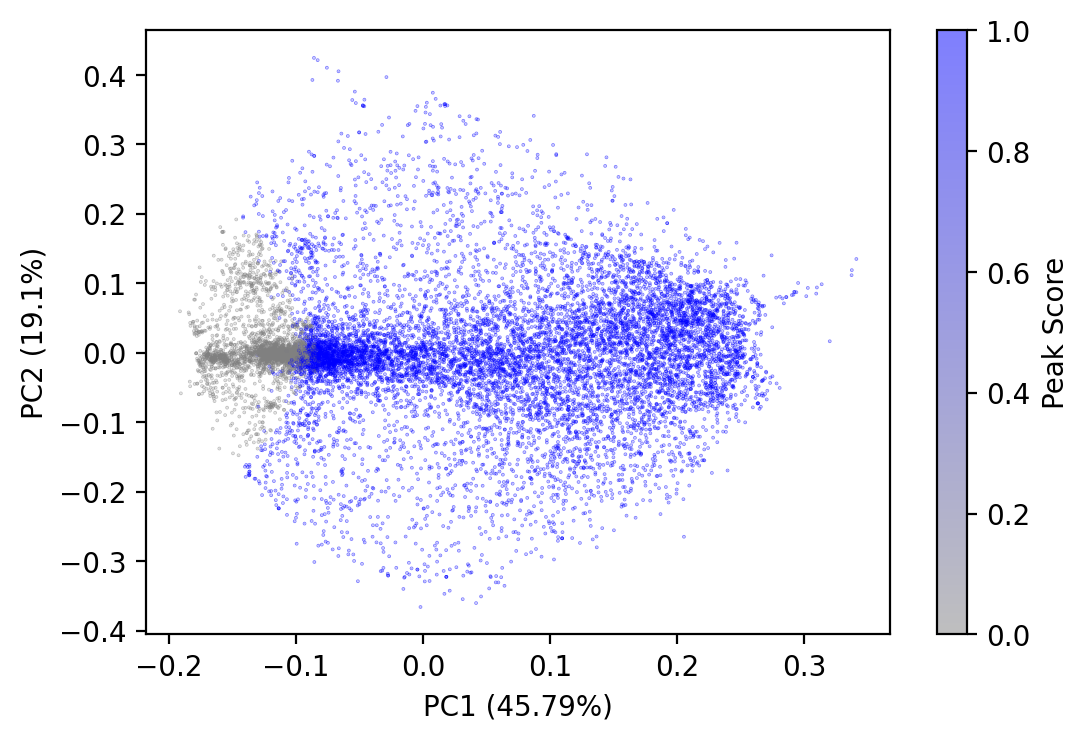

In [9]:
pca = PCA(2)
loads = pca.fit_transform(X_norm)
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
plt.scatter(loads[:,0],loads[:,1],c=scores,s=.1,alpha=.5,cmap=colormap)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="Peak Score")

Text(0, 0.5, '% of features')

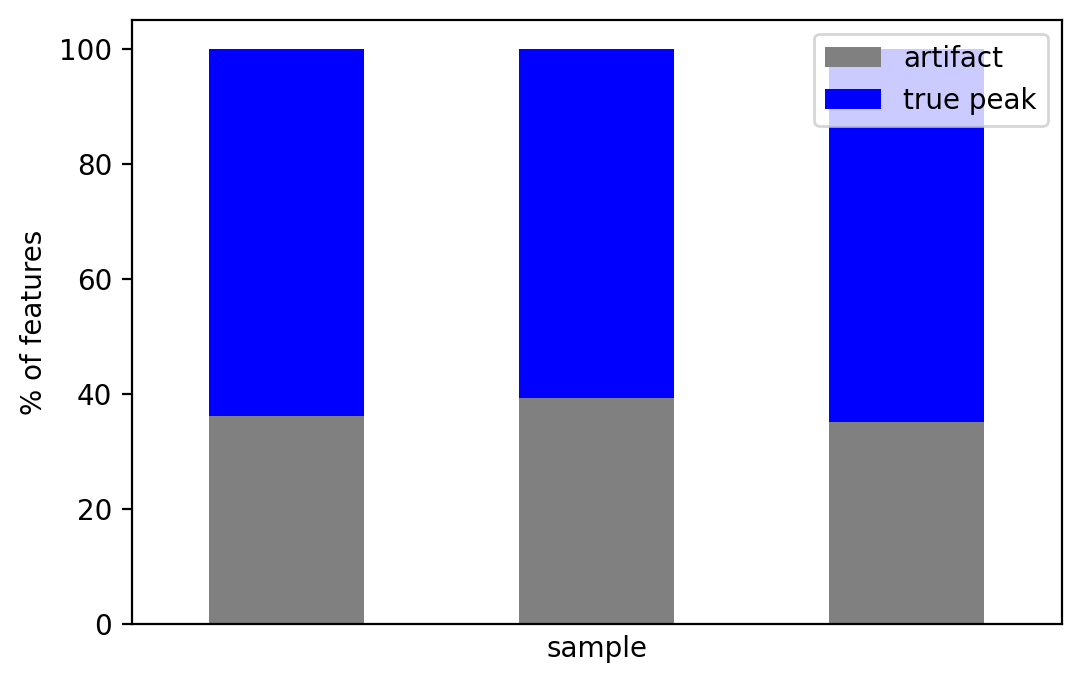

In [10]:
df = {}
for file in files:
    for index,row in peakList.iterrows():
        if index in ms1_peaks_curated[datadir + file].index.values:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

['WU350-075_d7_neg_ID_04.mzML', 'WU350-087_d0_ID_04.mzML', 'WU350-092_d14_neg_ID_04.mzML']


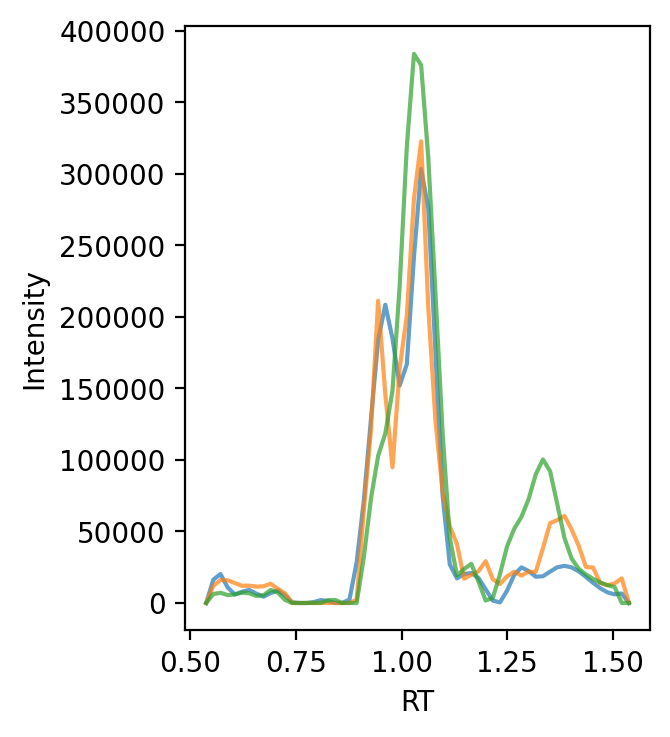

In [36]:
def plot_overlayedEIC(rawdatas,mz,rt_start,rt_end,resolution=60,smoothing=0,alpha=0.3):
    ts = np.linspace(rt_start,rt_end,resolution)
    for data in rawdatas:
        s = data.interpolate_data(mz,rt_start,rt_end,smoothing)
        ints  = [np.max([x,0]) for x in s(ts)]
        plt.plot(ts,ints,alpha=alpha)

file = datadir + files[0]
print(files)
inds = list(peakList.index.values)
rd.shuffle(inds)
plt.figure(figsize=(3,4))
for i in inds:
    if i in ms1_peaks_curated[file].index.values:
        plot_overlayedEIC(raw_data,ms1_peaks_curated[file].at[i,"mz"],ms1_peaks_curated[file].at[i,"rt"]-.5,ms1_peaks_curated[file].at[i,"rt"]+.5,resolution=resolution,alpha=0.7)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

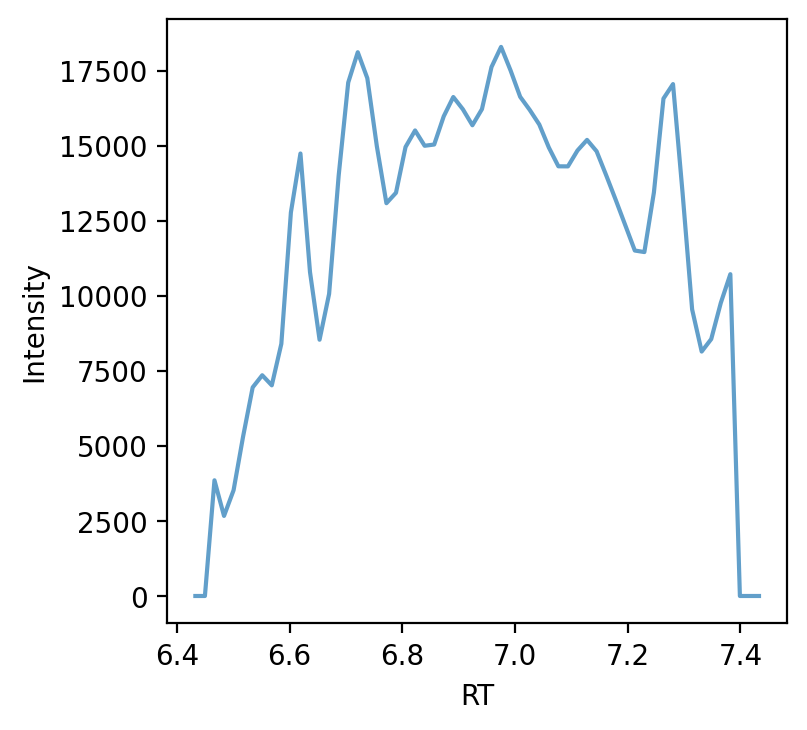

In [53]:
file = datadir + files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
plt.figure(figsize=(4,4))

for i in inds:
    if i not in ms1_peaks_curated[file].index.values:
        plot_overlayedEIC(raw_data[:1],peakList.at[i,"mz"],peakList.at[i,"rt"]-.5,peakList.at[i,"rt"] + .5,resolution=resolution,alpha=0.7)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

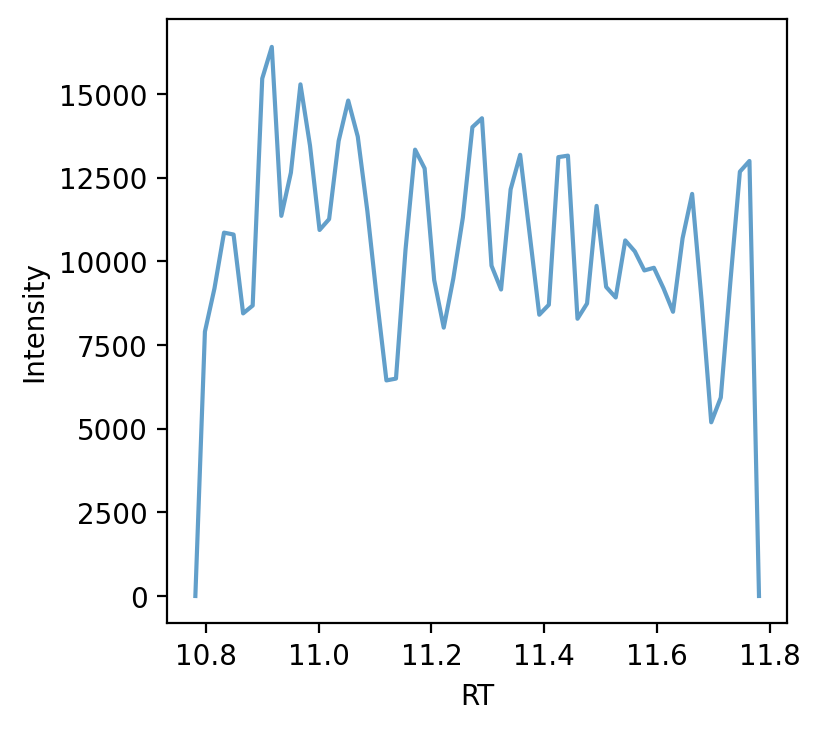

In [72]:
file = datadir + files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
plt.figure(figsize=(4,4))

for i in inds:
    if i not in ms1_peaks_curated[file].index.values:
        plot_overlayedEIC(raw_data[:1],peakList.at[i,"mz"],peakList.at[i,"rt"]-.5,peakList.at[i,"rt"] + .5,resolution=resolution,alpha=0.7)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

In [20]:
if __name__ == "__main__":
    ms1_peaks_recurse = {}
    for x in range(len(files)):
        rois = integ.roiDetection(raw_data[x],intensityCutuff=1000,numDataPoints=5)
        peaks = integ.detectPeaks(raw_data[x],rois,window=10,cutoff = 0.5,noiseCutoff=4.0)
        ms1_peaks_recurse[files[x]] = pd.DataFrame(data=np.array(peaks),columns=["mz","rt"])
        

Detecting ROIs |████████------------------------------------------| 17.8% 479 ROIs found

Detecting ROIs |█████████████████████████████████████████████████-| 99.7% 2191 ROIs found
2201  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\PeakDetective\__init__.py:495: RuntimeWarning:

divide by zero encountered in log10

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\PeakDetective\__init__.py:495: RuntimeWarning:

invalid value encountered in log10



done,  198090  EICs generated
smoothing EICs...
6191/6191 [==============================] - 39s 6ms/step
done
classifying peaks...
6191/6191 [==============================] - 7s 1ms/step
done
8190  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 4439 ROIs found
4433  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  398970  EICs generated
smoothing EICs...
12468/12468 [==============================] - 80s 6ms/step
done
classifying peaks...
12468/12468 [==============================] - 13s 1ms/step
done
12461  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.7% 2298 ROIs found
2291  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  203899  EICs generated
smoothing EICs...
6372/6372 [==============================] - 40s 6ms/step
done
classifying peaks...
6372/6

In [21]:
ms1_peaks_recurse

{'WU350-075_d7_neg_ID_04.mzML':               mz         rt
 0      69.009284   0.668823
 1      69.009284   0.835490
 2      69.009284   1.835490
 3      69.009284   2.835490
 4      70.945958   5.335490
 ...          ...        ...
 8185  897.786290   9.668823
 8186  897.786290  10.335490
 8187  897.786290  11.002156
 8188  897.786290  11.335490
 8189  897.786290  11.835490
 
 [8190 rows x 2 columns],
 'WU350-087_d0_ID_04.mzML':                mz         rt
 0       70.945943   5.168078
 1       71.011259  12.834745
 2       71.013688   0.668078
 3       71.013688   1.668078
 4       71.013688   2.168078
 ...           ...        ...
 12456  792.750007  12.334745
 12457  792.750007  13.501411
 12458  792.750007  14.001411
 12459  792.750007  14.668078
 12460  797.724364  12.668078
 
 [12461 rows x 2 columns],
 'WU350-092_d14_neg_ID_04.mzML':               mz         rt
 0      69.009281   0.668811
 1      69.009281   1.168811
 2      69.009281  13.002145
 3      69.009281  14.335478


In [22]:

#X_tot = self.makeDataMatrix([rawData],rois,rt_starts,rt_ends,0)

uniqueFeatures = {}
mzTol = 20
rtTol = 10/60

labels = []
X_all = []

for x in range(len(files)):
    print(x)
    xcms_peaks_curated = ms1_peaks_curated[datadir + files[x]]
    tmp = [x for x in peakList.index.values if x not in xcms_peaks_curated.index.values]
    xcms_peaks_not_curated = peakList.loc[tmp,:]
    inXCMS = []
    for index,row in ms1_peaks_recurse[files[x]].iterrows():
        minMz = row["mz"] - mzTol * row["mz"] / 1e6
        maxMz = row["mz"] + mzTol * row["mz"] / 1e6
        unique = True
        for index2,row2 in peakList.iterrows():
            if row2["mz"] > minMz and row2['mz'] < maxMz:
                if np.abs(row2["rt"] - row["rt"]):
                    unique = False
                    break
        
        inXCMS.append(not unique)
        
    ms1_peaks_recurse[files[x]]["found in xcms"] = inXCMS
    
    newFeats = ms1_peaks_recurse[files[x]][ms1_peaks_recurse[files[x]]["found in xcms"] == False]
    
    tmp = integ.makeDataMatrix([raw_data[x]],xcms_peaks_not_curated["mz"].values,xcms_peaks_not_curated["rt"].values - .5, xcms_peaks_not_curated["rt"].values + .5)
    X_all += list(tmp)
    labels += [0 for _ in range(len(tmp))]
    
    tmp = integ.makeDataMatrix([raw_data[x]],xcms_peaks_curated["mz"].values,xcms_peaks_curated["rt"].values - .5, xcms_peaks_curated["rt"].values + .5)
    X_all += list(tmp)
    labels += [1 for _ in range(len(tmp))]
    
    tmp = integ.makeDataMatrix([raw_data[x]],newFeats["mz"].values,newFeats["rt"].values - .5, newFeats["rt"].values + .5)
    X_all += list(tmp)
    labels += [2 for _ in range(len(tmp))]

0
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
1
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
2
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 


In [23]:
X_all_norm = integ.smoother.predict(normalizeMatrix(X_all))

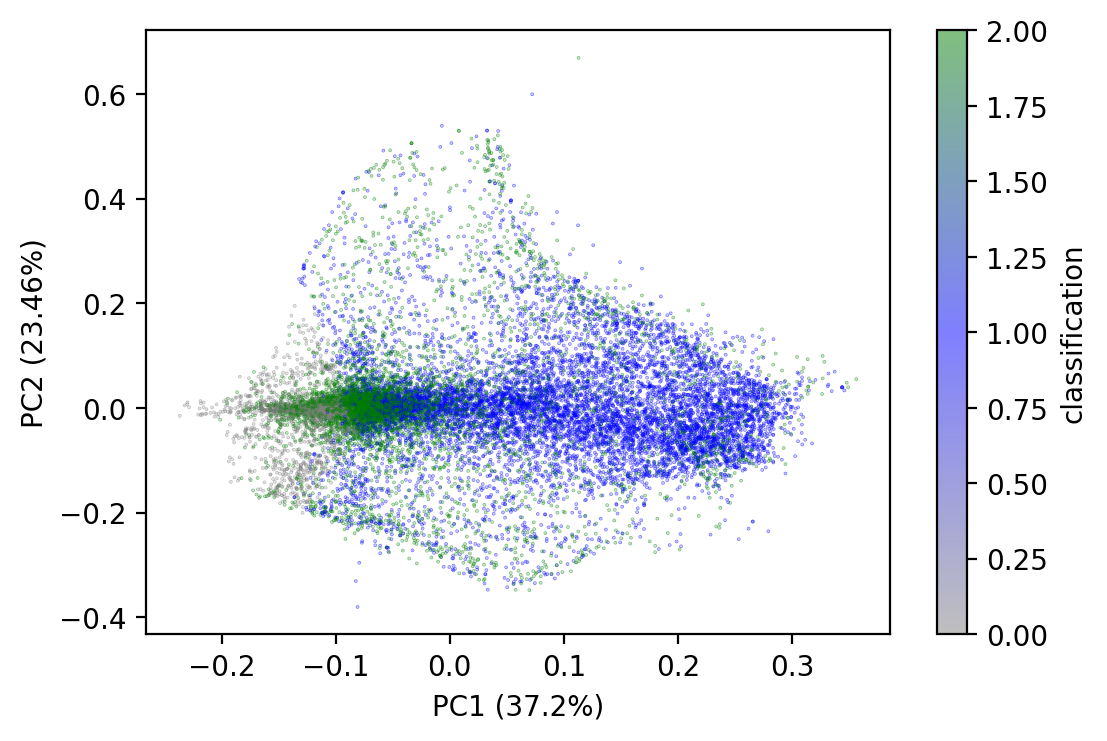

In [27]:
pca = PCA(2)
loads = pca.fit_transform(X_all_norm)
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue","green"],N=256)
plt.scatter(loads[:,0],loads[:,1],c=labels,s=.1,alpha=.5,cmap=colormap)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="classification")
#plt.xlim((-2,2))
#plt.ylim((-2,2))

,XCMS artifact,XCMS true peak,PeakDetective recovered
sample,,,
WU350-075_d7_neg_ID_04.mzML,29.041641,51.393141,19.565217
WU350-087_d0_ID_04.mzML,23.294622,35.945428,40.759950
WU350-092_d14_neg_ID_04.mzML,28.870489,53.210436,17.919075


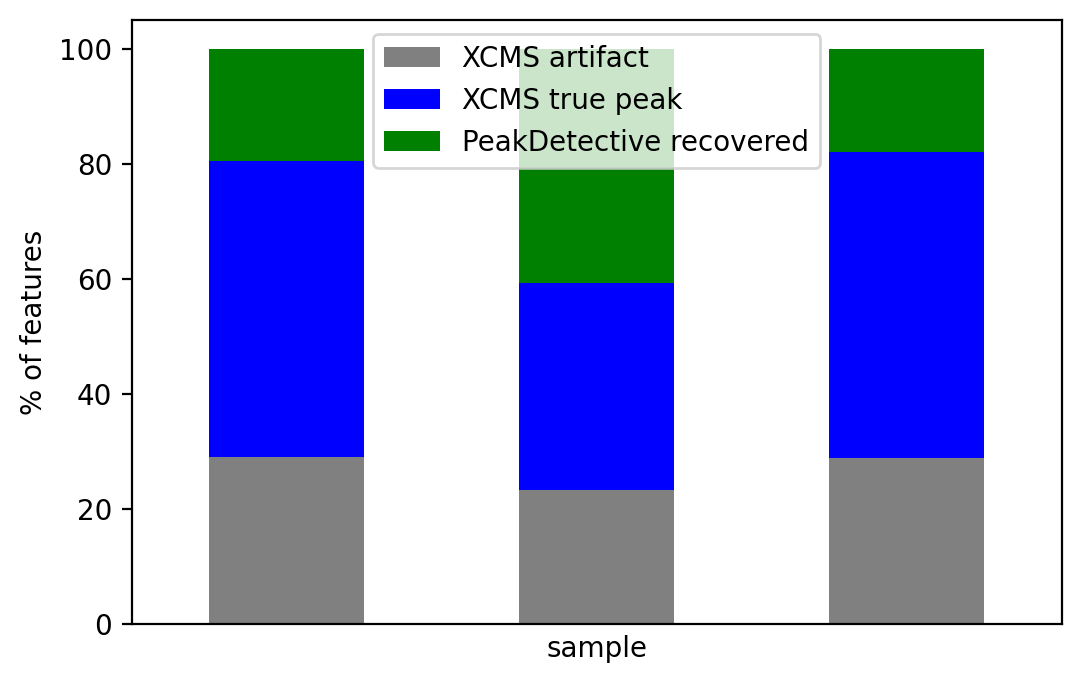

In [35]:
df = {}
for x in range(len(files)):
    xcms_peaks_curated = ms1_peaks_curated[datadir + files[x]]
    tmp = [x for x in peakList.index.values if x not in xcms_peaks_curated.index.values]
    xcms_peaks_not_curated = peakList.loc[tmp,:]
    for _ in range(len(xcms_peaks_not_curated)):
        df[len(df)] = {"sample":files[x],"classification":"XCMS artifact"}

    tmp = ms1_peaks_curated[datadir + files[x]]
    for _ in range(len(tmp)):
        df[len(df)] = {"sample":files[x],"classification":"XCMS true peak"} 
        
    tmp = ms1_peaks_recurse[files[x]][ms1_peaks_recurse[files[x]]["found in xcms"] == False]
    for _ in range(len(tmp)):
        df[len(df)] = {"sample":files[x],"classification":"PeakDetective recovered"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue","green"])
plt.xticks([],[])
plt.ylabel("% of features")
aggregate('sample','classification',df)